<a href="https://colab.research.google.com/github/harmalh/HAWK-ML-DL/blob/master/6_Hauptkomponentenanalyse_mit_logistischer_Regression_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sitzung 6: Hauptkomponentenanalyse/Principal Component Analysis (PCA)**

Zunächst müssen alle für die Datenverarbeitung sowie explorative Datenanalyse notwendigen Packages importiert werden. Pandas dient der Datenverarbeitung, matplotlib sowie seaborn der Datenvisualisierung und numpy der Arbeit mit Arrays. Anschließen importieren wir noch die Funktionen StandardScaler und PCA aus sklearn zur Durchführung der Hauptkomponentenanalyse.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Als nächstes importieren wir den Datensatz. Dabei handelt es sich um tägliche Wetterdaten aus Australien zur Vorhersage der Regenwahrscheinlichkeit am nächsten Tag. Bisher haben wir unsere Daten entweder mit einem Link zu einer Google-Tabelle oder einem externen Link importiert. Dieses Mal wird die Datei direkt in SageMaker gespeichert, da Sie größer ist als die bisherigen Daten.

Für eine vereinfachte weitere Analyse speichern wir unseren DataFrame in "df".

##1. Datenimport und -vorbearbeitung

In [ ]:
pd.options.display.max_columns=50
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Um uns als erstes einen Überblick über die Daten zu verschaffen, nutzen wir die .info()-Funktion, welche uns alle Variablen auflistet und detaillierte Informationen zu den Variablen und Datentypen bietet.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Wie bei der letzten Sitzung könnt ihr euch die Anzahl an fehlenden Werten mit dem folgenden Code anzeigen lassen. Bei der Mehrheit der Variablen gibt es fehlende Werte. Im Fall unseres targets (RainTomorrow) entfernen wir alle Beobachtungen mit fehlenden Werten. Bei den übrigen features ersetzen wir die fehlenden Werte durch deren Mittelwert der gesamten Spalte.

##2.Explorative Datenanalyse

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df=df[pd.isnull(df['RainTomorrow'])==False]
df=df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Mit der .info()-Funktion konnten wir uns die Datentypen ausgeben lassen. Dabei haben wir gesehen, dass es sich bei den beiden Variablen "RainToday" und "RainTomorrow" um Objects handelt. Mit der .value_counts()-Funktion können wir uns die Werte genauer anschauen.

In [ ]:
df['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [ ]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Für die weitere Verarbeitung generieren wir für beide Variablen numerische Werte. "Yes" entspricht dem Wert 1 und "No" dem Wert 0.

In [ ]:
df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

Um einen Eindruck von der Verteilung des targets zu bekommen, schauen wir uns die Verteilung von "RainTomorrowFlag" in einem countplot an. Es zeigt sich, dass es deutlich mehr trockene Tage als Regentage gibt.

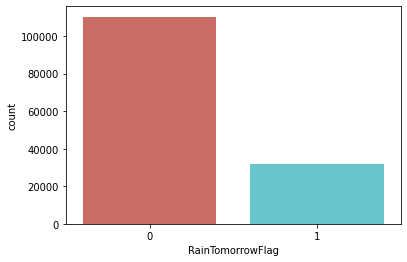

In [ ]:
sns.countplot(x='RainTomorrowFlag', data=df, palette = 'hls')
plt.show()

##3. Hauptkomponentenanalyse

Die Hauptkomponentenanalyse baut auf der Korrelation zwischen den betrachteten Variablen auf. Daher erstellen wir als erstes die Korrelationsmatrix und visualisieren diese dann mit einer Heatmap.

In [ ]:
corrMatrix = df.corr()

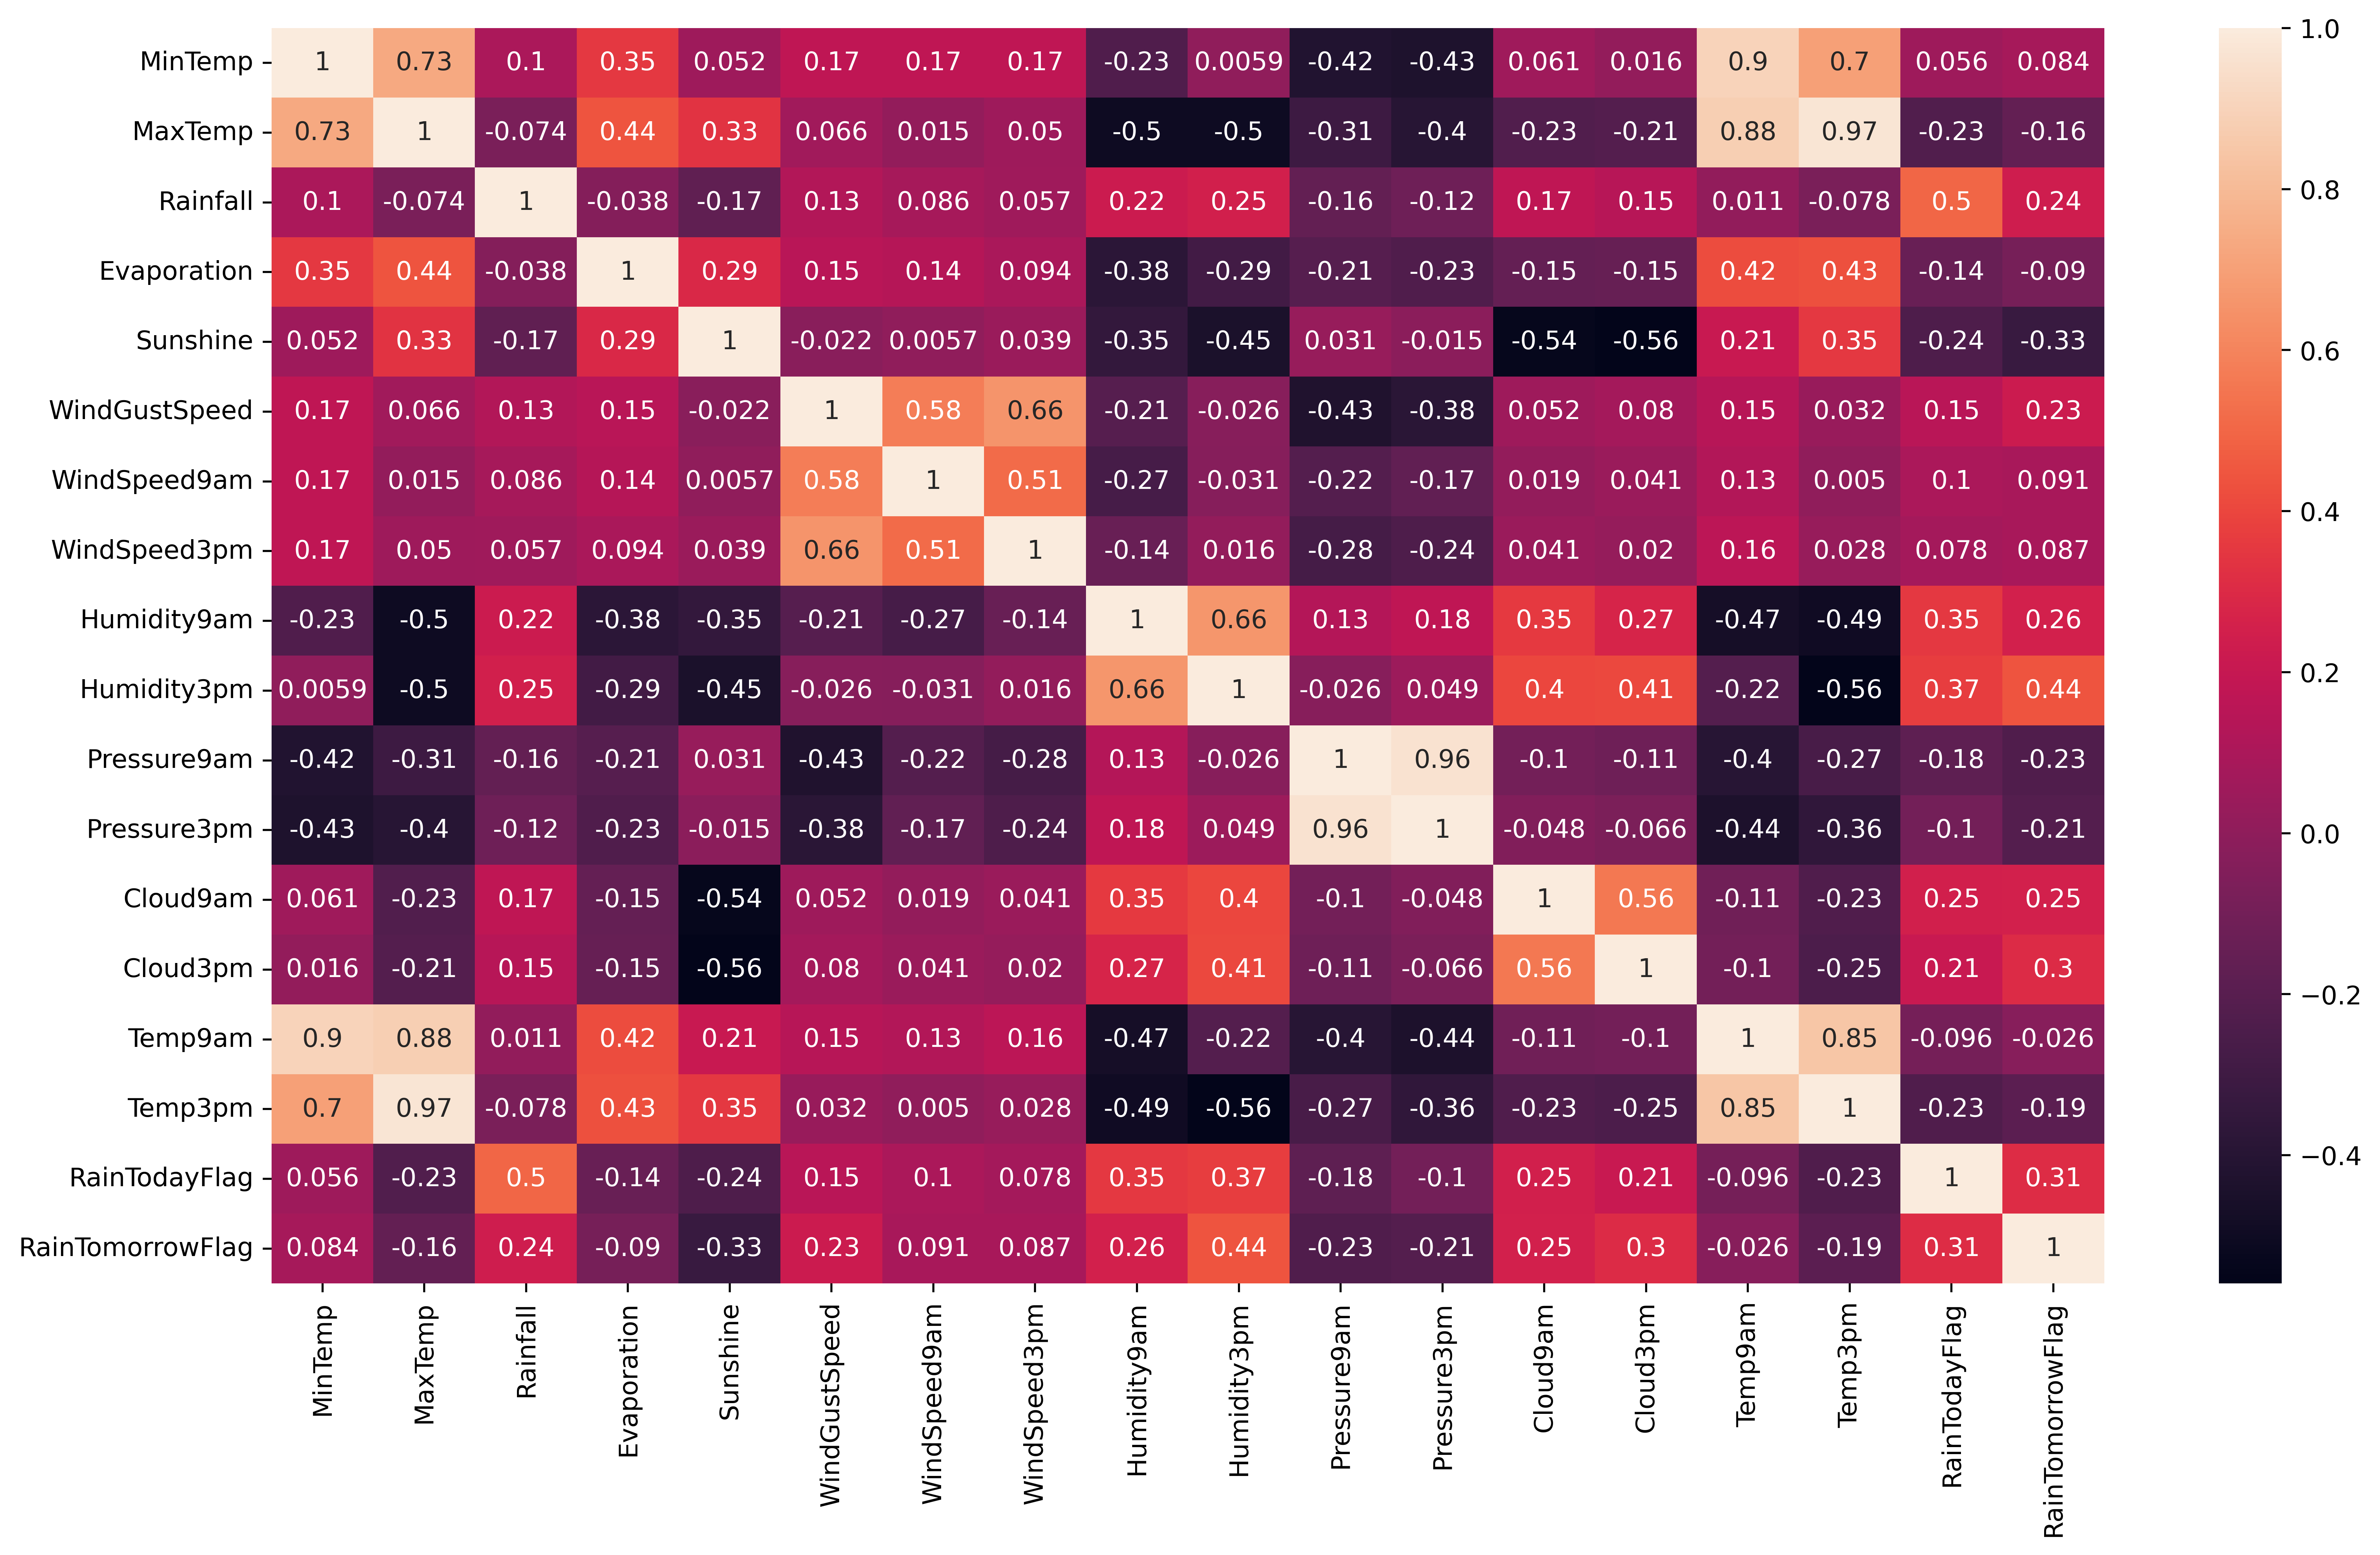

In [ ]:
plt.figure(figsize=(16,9), dpi=500)
sns.heatmap(corrMatrix, annot=True)
plt.show()

Im nächsten Schritt bereiten wir die Hauptkomponentenanalyse vor. Dafür fassen wir zunächst alle features, die in der PCA berücksichtigt werden sollen in X zusammen. Für unsere spätere Arbeit speichern wir unser target "RainTomorrowFlag" bereits jetzt in y.

In [ ]:
X=df[['Evaporation','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
      'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag'
     ]]

y = df['RainTomorrowFlag'].values

Der nächste Schritt der Hauptkomponentenanalyse ist die Standardisierung der Daten. Dafür nutzen wir wie bereits in der letzten Sitzung die StandardScaler-Funktion aus sklear.

In [ ]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

Der nachfolgende Code definiert die PCA-Funktion in pca. Das Attribut n_components bestimmt die Anzahl der Komponenten die generiert werden sollen. Wir nutzen hier zunächst die maximal mögliche Anzahl an Komponenten.

In [ ]:
pca = PCA(n_components=17)

Anschließend nutzen wir die .fit()-Funktion um die Hauptkomponentenanalysen auf die standardisierten Daten anzuwenden.

In [ ]:
X_trans=pca.fit_transform(X_std)

Im nächsten Schritt betrachten wir die Anzahl an features, samples, Komponenten und die erklärte Varianz.

In [ ]:
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  18
No. of samples:  142193
No. of components:  17
Explained variance ratio:  [0.30919148 0.18255457 0.11019901 0.07510751 0.06932381 0.06053922
 0.04353857 0.0295253  0.02672962 0.02426393 0.02348724 0.01843863
 0.01611241 0.00587385 0.00210835 0.00164125 0.00136527]


Den Anteil der erklärten Varianz der einzelnen Komponenten können wir uns auch grafisch anzeigen lassen. Dafür definieren wir zunächst unsere Achsenabschnitte und erstellen dann ein Balkendiagramm mit verschiedenen Funktionen aus matplotlib.

In [ ]:
x_ax=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
     'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']
y_ax=pca.explained_variance_ratio_.round(3)*100

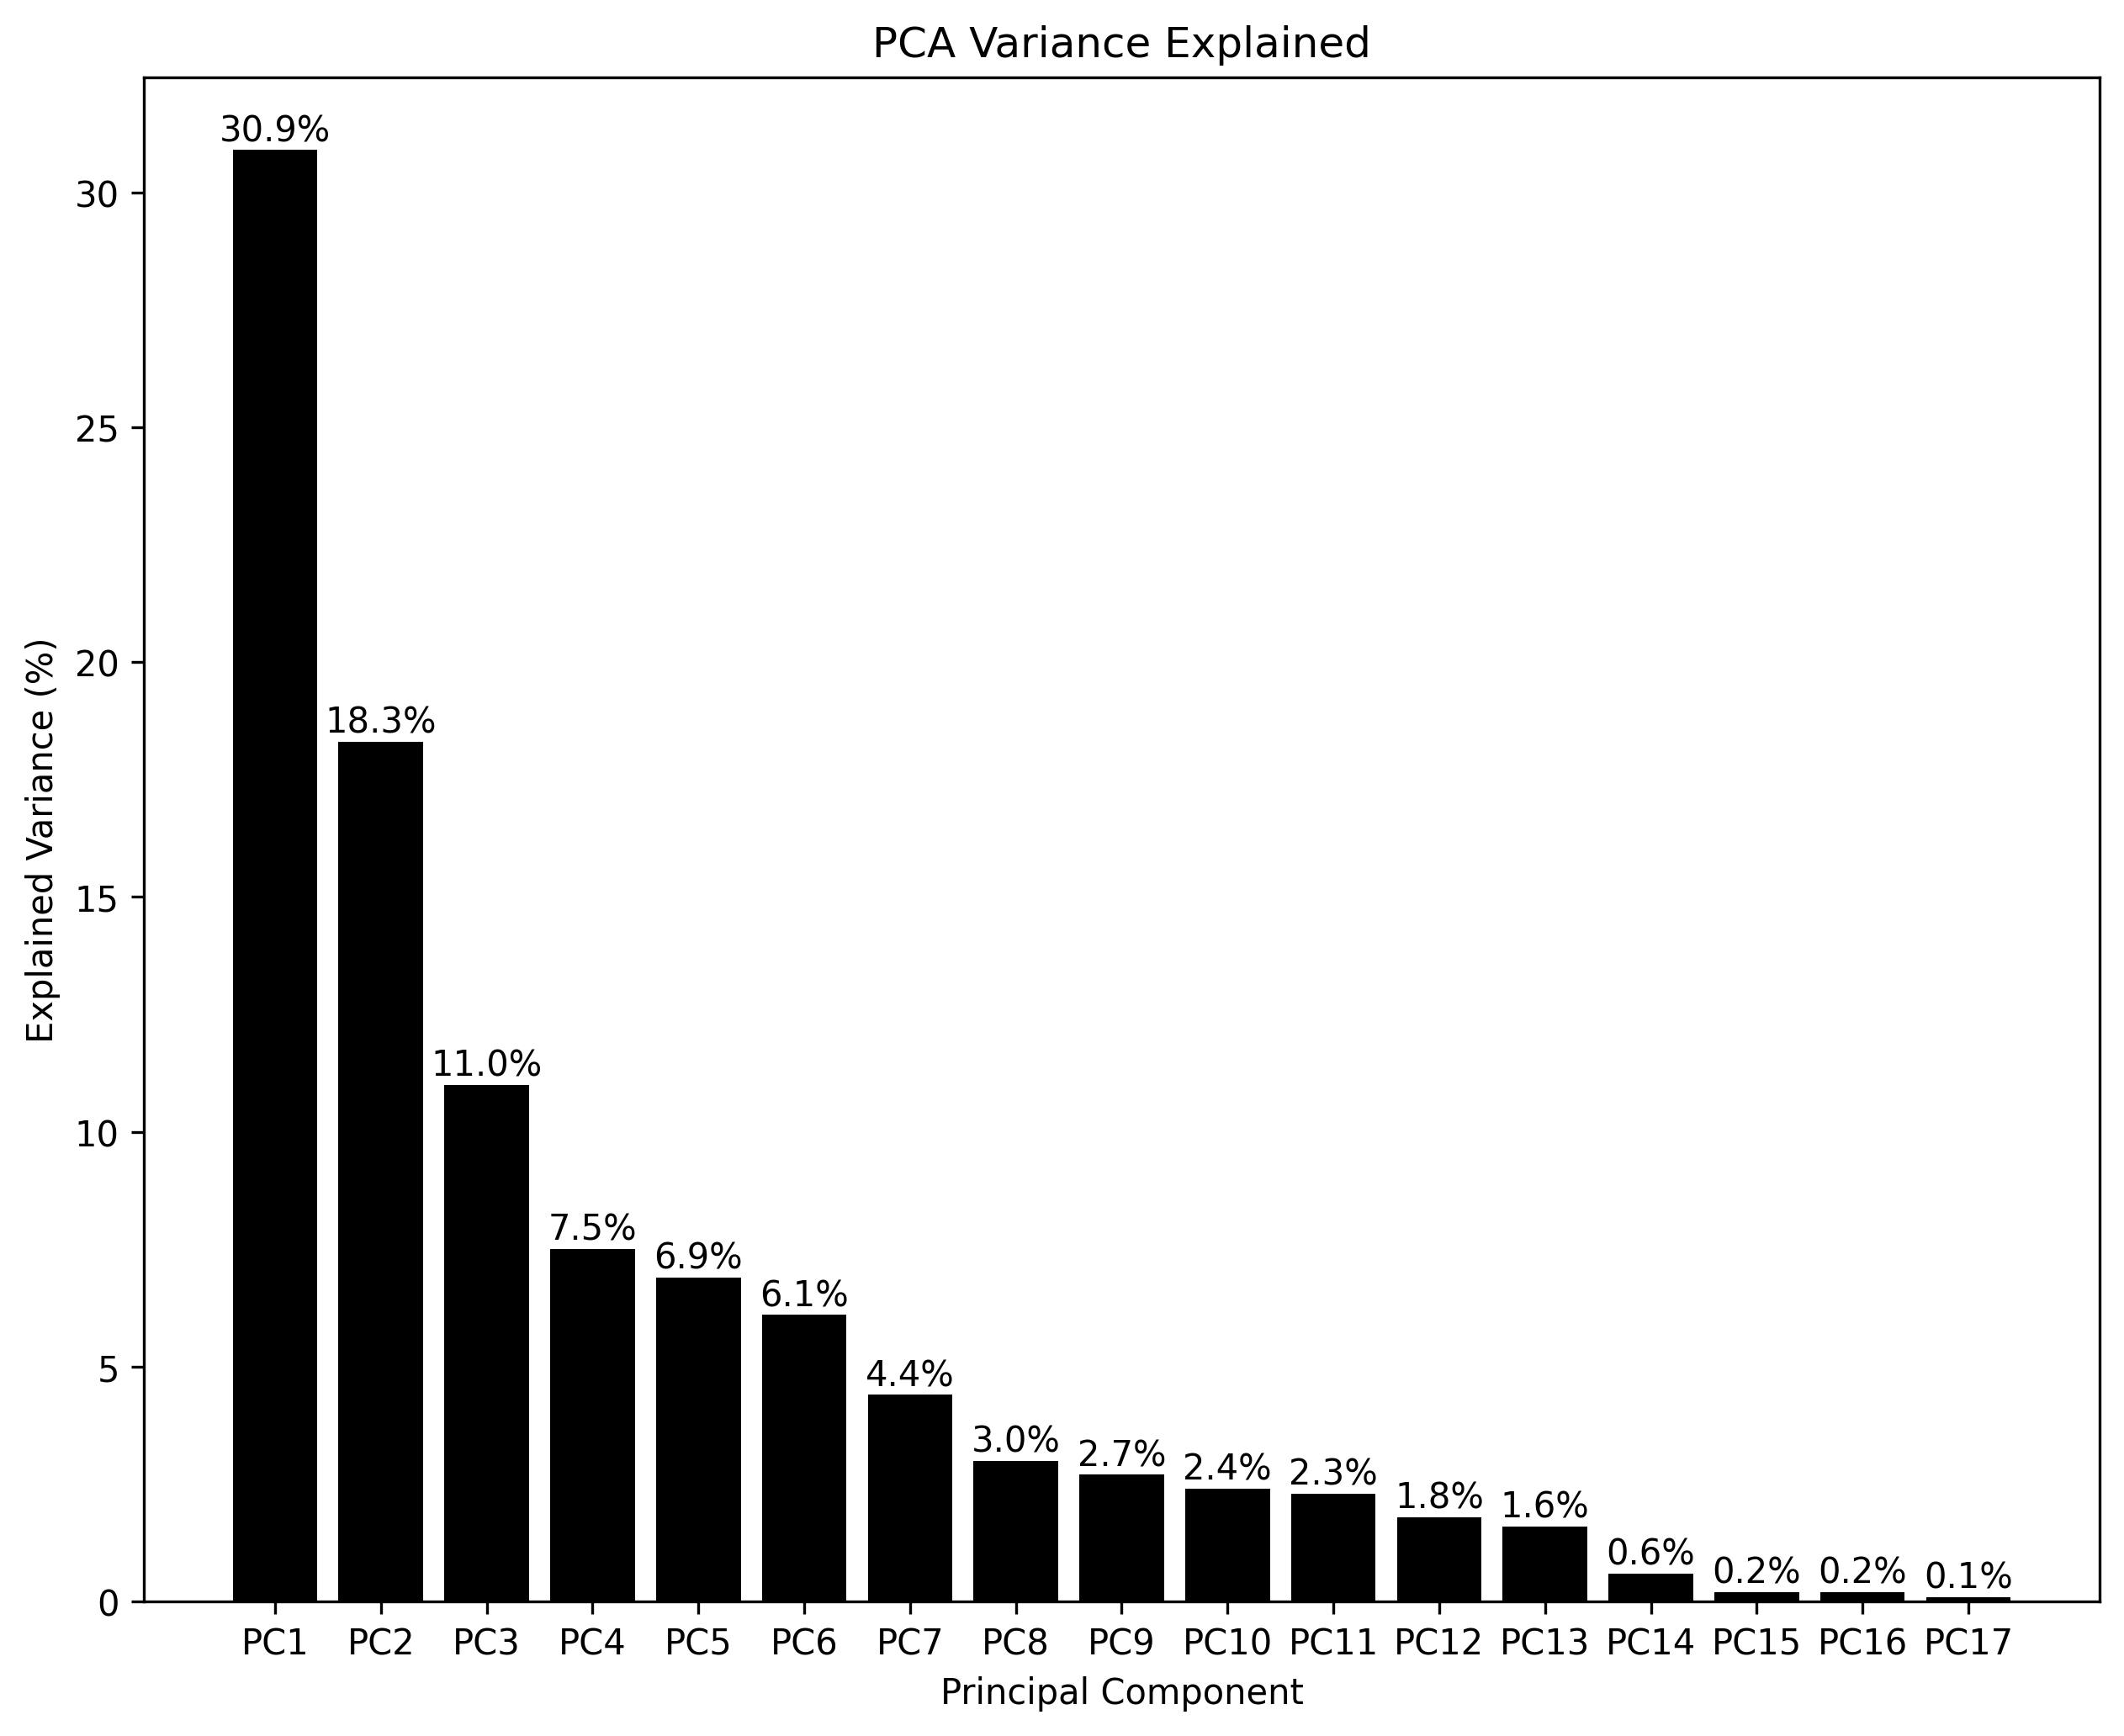

In [ ]:
plt.figure(figsize=(10,8), dpi=300)
plt.bar(x=x_ax, height=y_ax, color='black')
for i in range(len(x_ax)):
    plt.text(i,y_ax[i]+0.2,str(y_ax[i].round(3))+'%', ha = 'center')
plt.title(label='PCA Variance Explained', loc='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

plt.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
# Beispiel-Visualisierung aus: https://plotly.com/python/pca-visualization/
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Die Hauptkomponentenanalyse wird häufig zur Reduzierung der Komplexität der Daten genutzt, um anschließend weitere Analysen wie z.B. eine lineare oder logistische Regressionen durchzuführen. Da es sich bei unserem target um eine binäre Variable handelt, liegt hier ein Klassifizierungsproblem vor. In einem solchen Fall können wir mit der Pipeline()-Funktion aus sklearn die Standardisierung der Daten, die PCA und die logistische Regression in einem Schritt durchführen. Obwohl wir die Standardisierung bereits oben durchgeführt haben, wird das Vorgehen mit der Pipeline()-Funktion hier nochmal für alle drei Schritte gemeinsam veranschaulicht.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=3)),
                 ('classifier', LogisticRegression())])

Wie bereits beim letzten Mal nutzen wir den train-test-split um das Modell mit einem bestimmten Anteil der Daten zu trainieren und anschließend die Leistungsfähigkeit des Modells mit den übrigen Daten zu testen.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Anschließend wenden wir die Analyseschritte auf den Trainingsdatensatz an.

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reducer', PCA(n_components=3)),
                ('classifier', LogisticRegression())])

Die pipe.steps-Funktion ermöglicht es, sich die einzelnen Analyseschritte anzeigen zu lassen.

In [ ]:
print(pipe.steps[1])

('reducer', PCA(n_components=3))


Mit der cumsum()-Funktion können wir dann untersuchen, wie viel Varianz in den Daten durch die drei Komponenten erklärt wird (61.45%).

In [ ]:
pipe.steps[1][1].explained_variance_ratio_.cumsum()

array([0.30955861, 0.49202529, 0.60210504])

Als letzten nutzen wir erneut die Testdaten, um die Leistungsfähigkeit unseres Modells zu bestimmen.

In [ ]:
print(pipe.score(X_test, y_test))

0.8253806392629839
